In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import MaxPooling2D
import keras.backend as K

In [3]:
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Text(0.5, 0, '5')

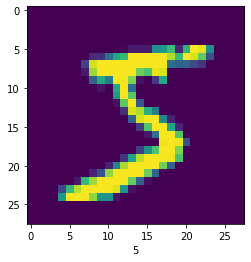

In [5]:
plt.imshow(x_train[0])
plt.xlabel(y_train[0])

In [6]:
if(K.image_data_format() == 'channels_first'):
    x_train = x_train.reshape(x_train.shape[0],1,28,28)
    x_test = x_test.reshape(x_test.shape[0],1,28,28)
    input_shape = (1,28,28)
else:
    x_train = x_train.reshape(x_train.shape[0],28,28,1)
    x_test = x_test.reshape(x_test.shape[0],28,28,1)
    input_shape = (28,28,1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
x_train /= 255
x_test /= 255

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [11]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(categorical_features=[0])
y_train = onehot.fit_transform(y_train).toarray()
y_test = onehot.fit_transform(y_test).toarray()
y_train

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of in

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [12]:
#models
model = Sequential()
model.add(Conv2D(28,(3,3),padding='same',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#neural_network
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(rate=0.20))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [13]:
model.fit(x_train,y_train,batch_size=256,epochs=15,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 99s 2ms/step - loss: 0.4501 - accuracy: 0.8559 - val_loss: 0.0834 - val_accuracy: 0.9717
Epoch 2/15
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1086 - accuracy: 0.9685 - val_loss: 0.0481 - val_accuracy: 0.9837
Epoch 3/15
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0771 - accuracy: 0.9772 - val_loss: 0.0417 - val_accuracy: 0.9868
Epoch 4/15
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0593 - accuracy: 0.9825 - val_loss: 0.0322 - val_accuracy: 0.9889
Epoch 5/15
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0487 - accuracy: 0.9859 - val_loss: 0.0291 - val_accuracy: 0.9912
Epoch 6/15
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0272 - val_accuracy: 0.9912
Epoch 7/15
60000/60000 [==============================] - 98s 2ms/

In [14]:
model.save('mnist.h5')